In [ ]:

import os
import cv2
import numpy as np
import tensorflow as tf
import sys
from matplotlib import pyplot as plt


sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

file_name = 'scratch149.jpg'

MODEL_NAME = 'inference_graph'
IMAGE_NAME = '/content/drive/My Drive/SheetMetal/models/research/object_detection/images/test/'+file_name

# Grab path to current working directory
CWD_PATH = '/content/drive/My Drive/SheetMetal/models/research/object_detection'

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 3


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)


image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')


detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')


detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')


num_detections = detection_graph.get_tensor_by_name('num_detections:0')


image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)


(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})



vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=2,
    min_score_thresh=0.60)

cv2.imwrite(file_name,image)


True

In [ ]:
%matplotlib inline

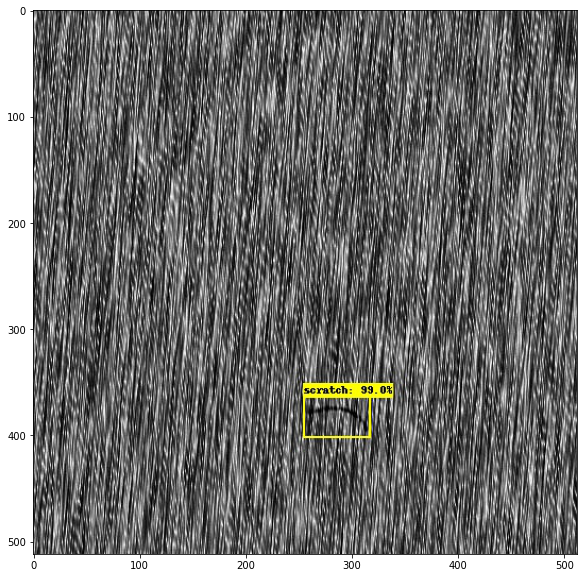

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread('scratch149.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image)